<a href="https://colab.research.google.com/github/mlynatom/speech2text/blob/master/speech2text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

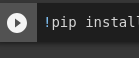 kliknout na kolečko 3*
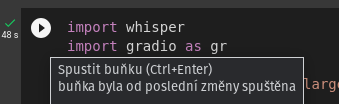
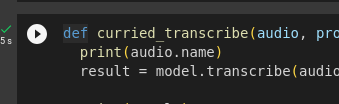
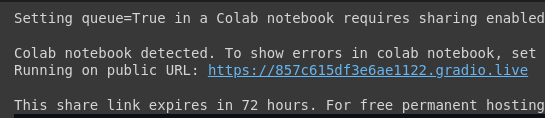
kliknutí na odkaz otevře v novém okně

Případně v pravo nahoře zkontrolovat jestli je běhové prostředí GPU

In [ ]:
!pip install -U openai-whisper gradio

## Load model

In [2]:
import whisper
import gradio as gr

model = whisper.load_model("large") #tiny, base, small, medium, large

In [ ]:
def curried_transcribe(audio, prompt, language):
  result = model.transcribe(audio=audio.name, word_timestamps=False, verbose=False, initial_prompt=prompt, language=language)["text"]
  return result

gr.Interface(
    title = 'Speech2text',
    fn=curried_transcribe,
    inputs=[
        #gr.Audio(source="upload", type="filepath", format="mp3"),
        gr.File(file_types=["m4a", "mp3", "wav"]),
        gr.Textbox(label="Initial prompt"),
        gr.Radio(["cs", "en"], value="cs", label="Language")
    ],
    outputs=[
        "textbox"
    ]).queue().launch(share=True)

## transcribe (debug / deprecated)

In [ ]:
PROMPT = "Rozhovor se starostou Sokola Kolín Barešem a Sokole v Kolíně a kuželně. Psaná spisovnou češtinou." #prompt co pomůže lépe přepsat
LANGUAGE = "cs" #jazyk (čeština - cs, angličtina - en atd dle ISO)
WORD_TIMESTAMPS = False #výstup kde jsou časy (True pokud chci/False pokud ne)
VERBOSE=True #postupný výpis
AUDIO = "/content/Bareš 1.m4a" #cesta k souboru

In [ ]:
result = model.transcribe(audio=AUDIO, verbose=VERBOSE, word_timestamps=WORD_TIMESTAMPS, initial_prompt=PROMPT, language=LANGUAGE)


In [ ]:
print(result["text"])